##### Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Encoding the categorical features
from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer


##### Performing EDA (Exploratory Data Analyst)

In [ ]:
md = pd.read_csv(r'datas\insurance.csv')
md.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
md.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
# Check for missing values
md.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

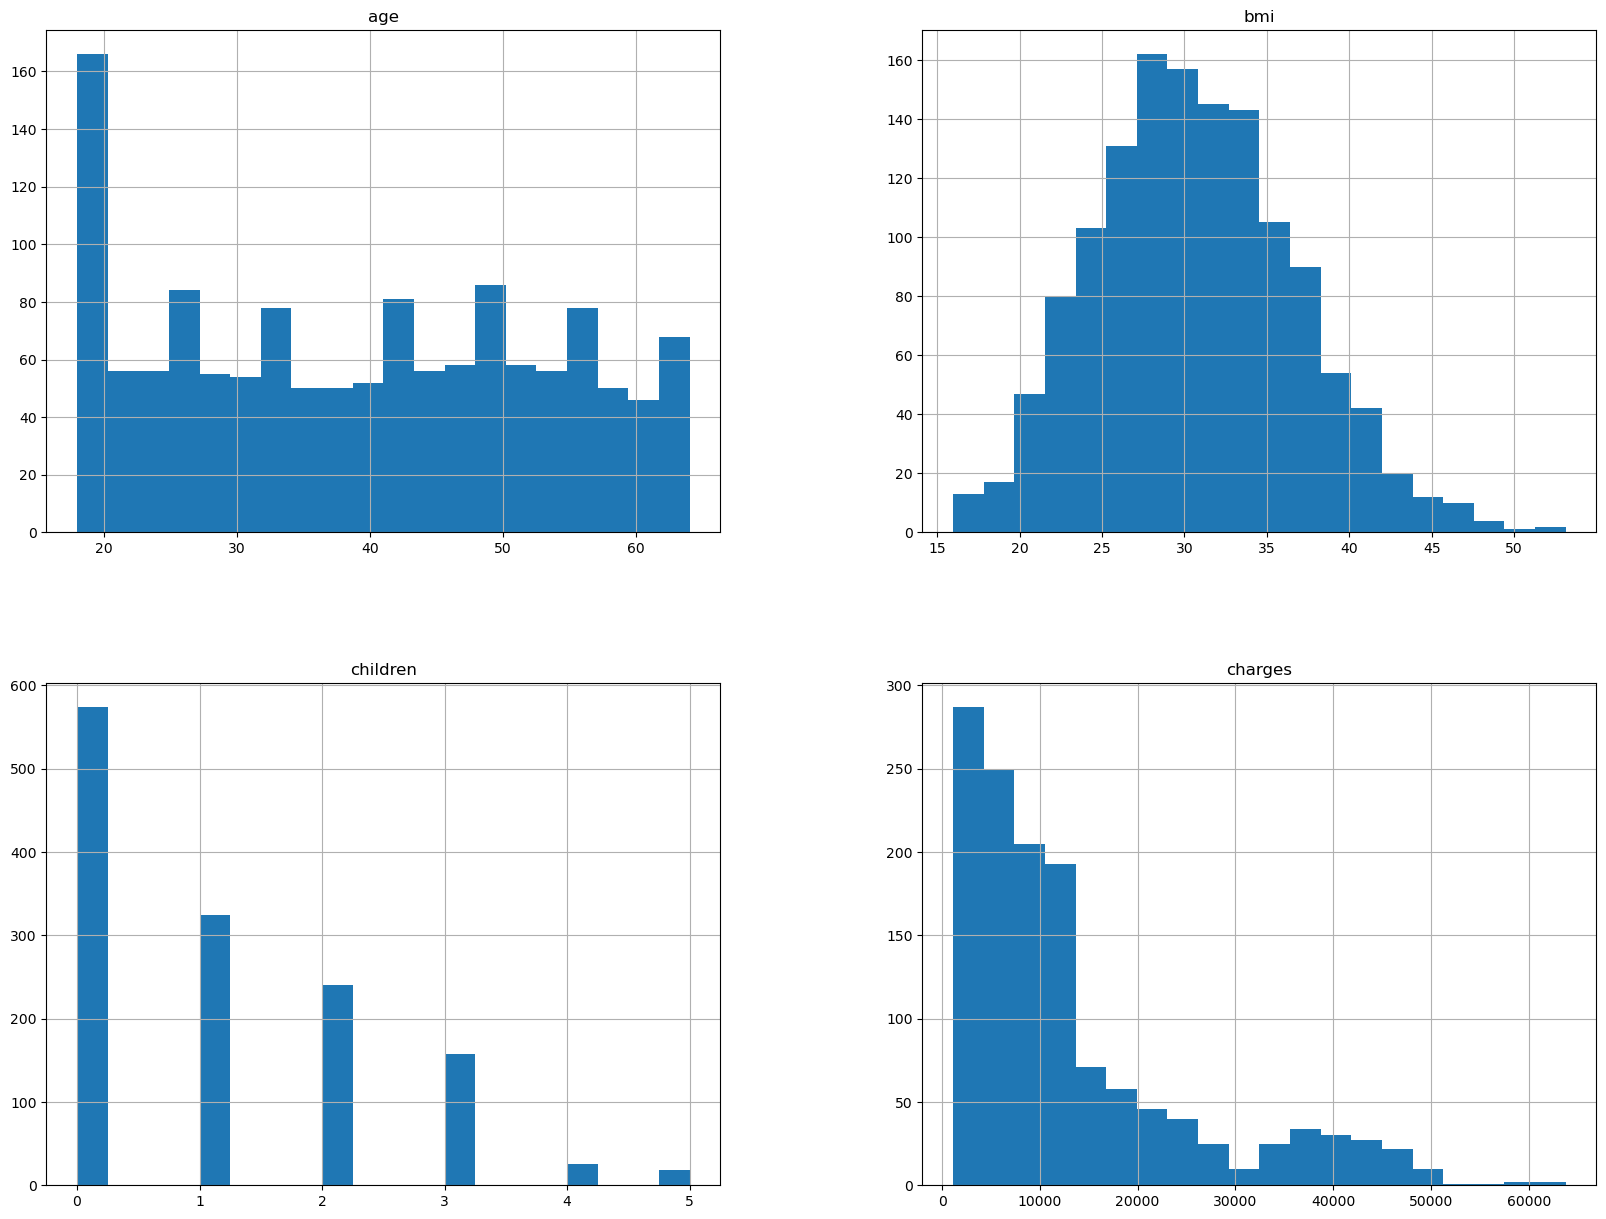

In [ ]:
%matplotlib inline

md.hist(bins=20,figsize=(20,15))
plt.show()

##### Splitting the dataset to train,valdiation and test datasets

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test) with stratification on the 'smoker' column
train_data, test_data = train_test_split(md, test_size=0.2, stratify=md['smoker'], random_state=42)

# Further split the training data into training and validation sets (80% train, 20% validation) with stratification on the 'smoker' column
train_data, val_data = train_test_split(train_data, test_size=0.1, stratify=train_data['smoker'], random_state=42)

# Display the sizes of the datasets
print(f"Training data size: {train_data.shape}")
print(f"Validation data size: {val_data.shape}")
print(f"Testing data size: {test_data.shape}")

Training data size: (963, 7)
Validation data size: (107, 7)
Testing data size: (268, 7)


In [ ]:
print(train_data.head())
print("="*80)
print(train_data['region'].value_counts())

      age     sex     bmi  children smoker     region      charges
1325   61    male  33.535         0     no  northeast  13143.33665
1202   22    male  32.110         0     no  northwest   2055.32490
526    19  female  30.590         2     no  northwest  24059.68019
47     28  female  34.770         0     no  northwest   3556.92230
1201   46    male  40.375         2     no  northwest   8733.22925
region
southeast    260
northeast    238
southwest    233
northwest    232
Name: count, dtype: int64


##### Finding the Coorelations between the target variable and features.

In [ ]:
trainDatacopy = train_data.copy()
trainDatacopy.head(5)

,age,sex,bmi,children,smoker,region,charges
1325,61,male,33.535,0,no,northeast,13143.33665
1202,22,male,32.110,0,no,northwest,2055.32490
526,19,female,30.590,2,no,northwest,24059.68019
47,28,female,34.770,0,no,northwest,3556.92230
1201,46,male,40.375,2,no,northwest,8733.22925


<Axes: xlabel='bmi', ylabel='charges'>

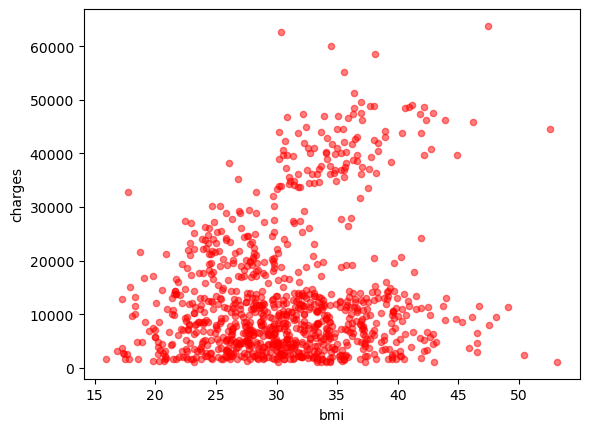

In [ ]:
trainDatacopy.plot(kind='scatter', x='bmi', y='charges', alpha=0.5, color='r')

In [ ]:
# Finding the correlation between the features
corr_metrix = trainDatacopy[['age', 'bmi', 'children', 'charges']].corr()

In [ ]:
corr_metrix["charges"].sort_values(ascending=False) # charges is highly correlated with age and bmi here categtorical features are not included in the correlation matrix

charges     1.000000
age         0.287323
bmi         0.197551
children    0.068208
Name: charges, dtype: float64

array([[<Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='bmi', ylabel='age'>,
        <Axes: xlabel='children', ylabel='age'>,
        <Axes: xlabel='charges', ylabel='age'>],
       [<Axes: xlabel='age', ylabel='bmi'>,
        <Axes: xlabel='bmi', ylabel='bmi'>,
        <Axes: xlabel='children', ylabel='bmi'>,
        <Axes: xlabel='charges', ylabel='bmi'>],
       [<Axes: xlabel='age', ylabel='children'>,
        <Axes: xlabel='bmi', ylabel='children'>,
        <Axes: xlabel='children', ylabel='children'>,
        <Axes: xlabel='charges', ylabel='children'>],
       [<Axes: xlabel='age', ylabel='charges'>,
        <Axes: xlabel='bmi', ylabel='charges'>,
        <Axes: xlabel='children', ylabel='charges'>,
        <Axes: xlabel='charges', ylabel='charges'>]], dtype=object)

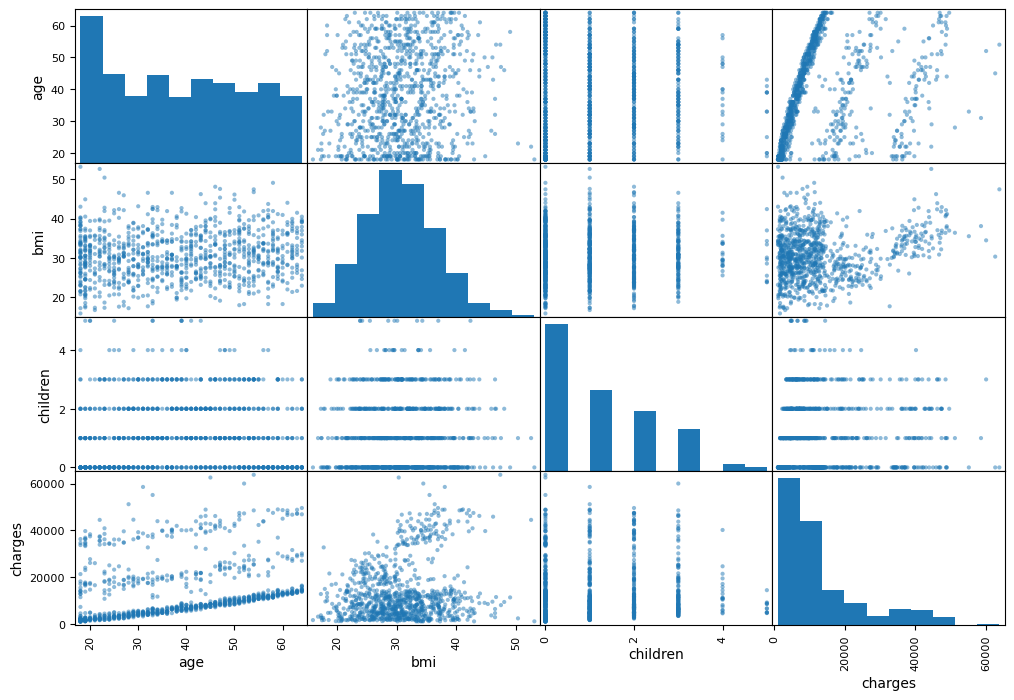

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(trainDatacopy, figsize=(12, 8))

###### Converting the categorical value to numeric

In [ ]:
trainDatacopy["sex"] = (trainDatacopy["sex"] == "female").astype(int)  #male = 0 and female = 1
trainDatacopy["smoker"] = (trainDatacopy["smoker"] == "yes").astype(int) #no = 0 and yes = 1``
trainDatacopy.head()

,age,sex,bmi,children,smoker,region,charges
1325,61,0,33.535,0,0,northeast,13143.33665
1202,22,0,32.110,0,0,northwest,2055.32490
526,19,1,30.590,2,0,northwest,24059.68019
47,28,1,34.770,0,0,northwest,3556.92230
1201,46,0,40.375,2,0,northwest,8733.22925


In [ ]:
updateTrainData = trainDatacopy

In [ ]:
updateTrainData["smoker"] = updateTrainData["smoker"].astype(float)
updateTrainData["smoker"].unique()

array([0., 1.])

In [131]:
updateTrainData["smoker"].value_counts()

smoker
0.0    766
1.0    197
Name: count, dtype: int64

In [132]:
# Combining the bmi and the smoker feature with the multiplication of both
updateTrainData["bmi_smoker"] = updateTrainData["bmi"] * updateTrainData["smoker"]

In [133]:
updateTrainData["smoker"].value_counts()

smoker
0.0    766
1.0    197
Name: count, dtype: int64

In [134]:
trainDatacopy.head()

,age,sex,bmi,children,smoker,region,charges,bmi_smoker
1325,61,0,33.535,0,0.0,northeast,13143.33665,0.0
1202,22,0,32.110,0,0.0,northwest,2055.32490,0.0
526,19,1,30.590,2,0.0,northwest,24059.68019,0.0
47,28,1,34.770,0,0.0,northwest,3556.92230,0.0
1201,46,0,40.375,2,0.0,northwest,8733.22925,0.0


In [135]:
corr_metrix = updateTrainData[['age', 'bmi', 'children', 'charges','bmi_smoker','sex']].corr()
corr_metrix["charges"].sort_values(ascending=False)

charges       1.000000
bmi_smoker    0.845023
age           0.287323
bmi           0.197551
children      0.068208
sex          -0.043819
Name: charges, dtype: float64

<Axes: xlabel='bmi_smoker', ylabel='charges'>

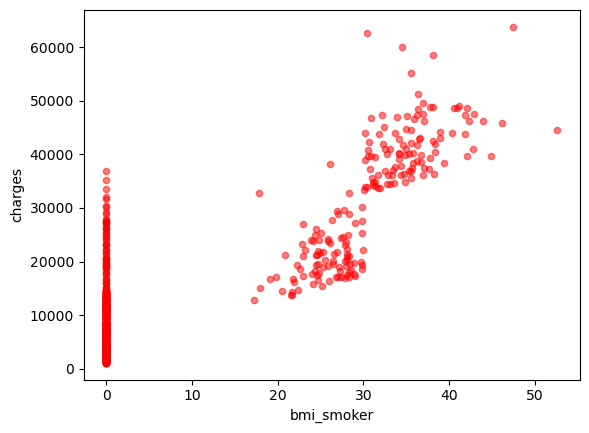

In [136]:
updateTrainData.plot(kind='scatter', x='bmi_smoker', y='charges', alpha=0.5, color='r')

##### Splitting the data in to X and Y i.e. X features and y label

In [137]:
updatetrainingFeatures = updateTrainData.drop("charges", axis=1)
updatetrainingLabels = updateTrainData["charges"].copy()

In [163]:
updatetrainingFeaturesRegion = updatetrainingFeatures[["region"]]
updatetrainingFeaturesRegion.head()

,region
1325,northeast
1202,northwest
526,northwest
47,northwest
1201,northwest


In [139]:
cat_encoder = OneHotEncoder()
updateRegionTrain_cat1hot = cat_encoder.fit_transform(updatetrainingFeaturesRegion)
updateRegionTrain_cat1hot

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 963 stored elements and shape (963, 4)>

In [140]:
cat_encoder.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

##### Creating the custom Transformer

In [141]:
# Customer transformer to add the bmi_smoker feature
from sklearn.base import BaseEstimator, TransformerMixin

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self): # no *args or **kargs
        pass
    
    def fit(self, X, y=None):
        return self  # nothing else to do
    
    def transform(self, X):
        Xcopy = X.copy()
        
        # Check if 'smoker' column exists
        if 'smoker' not in Xcopy.columns:
            raise ValueError("The input DataFrame must contain a 'smoker' column")
        
        # Ensure 'smoker' column is converted to float
        try:
            Xcopy["smoker"] = Xcopy["smoker"].astype(float)
        except ValueError:
            raise ValueError("The 'smoker' column must be convertible to float")
        
        # Print unique values for debugging
        print(Xcopy["smoker"].unique())
        
        # Check if 'bmi' column exists
        if 'bmi' not in Xcopy.columns:
            raise ValueError("The input DataFrame must contain a 'bmi' column")
        
        # Add the 'bmi_smoker' feature
        Xcopy["bmi_smoker"] = Xcopy["bmi"] * Xcopy["smoker"]
        
        return Xcopy

In [ ]:
class CategoricalBinaryTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, name_of_features=[], feature_value=[]):  
        self.name_of_features = name_of_features
        self.feature_value = feature_value

    def fit(self, X, y=None):
        return self  

    def transform(self, X):
        Xcopy = X.copy()  # Ensure X is copied correctly
        
        if not self.name_of_features or not self.feature_value:
            raise ValueError("No features and values provided for transformation")  

        if len(self.name_of_features) != len(self.feature_value):
            raise ValueError("Mismatch: 'name_of_features' and 'feature_value' must have the same length")

        for i, valueFeat in zip(self.name_of_features, self.feature_value):
            if i not in Xcopy.columns:
                raise ValueError(f"Feature '{i}' not found in DataFrame columns")
            Xcopy[i] = (Xcopy[i] == valueFeat).astype(int)

        return Xcopy


##### Tested custom transformer with the tested data.

In [183]:
practiceTrainCopy = train_data.copy()
practiceTrainCopy.head()

,age,sex,bmi,children,smoker,region,charges
1325,61,male,33.535,0,no,northeast,13143.33665
1202,22,male,32.110,0,no,northwest,2055.32490
526,19,female,30.590,2,no,northwest,24059.68019
47,28,female,34.770,0,no,northwest,3556.92230
1201,46,male,40.375,2,no,northwest,8733.22925


In [184]:
BinaryTransformer_addr = CategoricalBinaryTransformer(
    name_of_features=["sex", "smoker"], 
    feature_value=["female", "yes"]
)
convertedValue = BinaryTransformer_addr.transform(practiceTrainCopy)
print(convertedValue.head())  # Check the transformed data


      age  sex     bmi  children  smoker     region      charges
1325   61    0  33.535         0       0  northeast  13143.33665
1202   22    0  32.110         0       0  northwest   2055.32490
526    19    1  30.590         2       0  northwest  24059.68019
47     28    1  34.770         0       0  northwest   3556.92230
1201   46    0  40.375         2       0  northwest   8733.22925


In [157]:
convertedValue["sex"].unique()

array([0, 1])

In [159]:
# Adding the bmi_smoker feature to the training data
attr_adder = CombinedAttributesAdder()
trainingDataAddedFeatures= attr_adder.transform(convertedValue)
trainingDataAddedFeatures.head()

[0. 1.]


,age,sex,bmi,children,smoker,region,charges,bmi_smoker
1325,61,0,33.535,0,0.0,northeast,13143.33665,0.0
1202,22,0,32.110,0,0.0,northwest,2055.32490,0.0
526,19,1,30.590,2,0.0,northwest,24059.68019,0.0
47,28,1,34.770,0,0.0,northwest,3556.92230,0.0
1201,46,0,40.375,2,0.0,northwest,8733.22925,0.0


##### Building the Pipeline

In [199]:
# updatetrainingFeaturesWithoutRegion_num = updatetrainingFeatures.drop(columns=["region"], axis=1)
# updatetrainingFeaturesWithoutRegion_num.head()
xtrainfeatures = practiceTrainCopy.drop("charges", axis=1)
xtrainlabels = practiceTrainCopy["charges"].copy()
xtrainNum = xtrainfeatures.drop(columns=["region"], axis=1)
xtrainNum.head()

,age,sex,bmi,children,smoker
1325,61,male,33.535,0,no
1202,22,male,32.110,0,no
526,19,female,30.590,2,no
47,28,female,34.770,0,no
1201,46,male,40.375,2,no


In [91]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('BinaryTransformer_addr', CategoricalBinaryTransformer(name_of_features=["sex","smoker"],feature_value=["female","yes"])),
    ('attr_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

med_num_tr = num_pipeline.fit_transform(xtrainNum)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [ ]:
# Assuming med_num_tr is the ndarray you want to convert
column_names = ['age', 'sex', 'bmi', 'children', 'smoker', 'bmi_smoker']  # Specify the column names
med_num_tr_df = pd.DataFrame(med_num_tr, columns=column_names)
med_num_tr_df.head()

,age,sex,bmi,children,smoker,bmi_smoker
0,1.582371,-0.980461,0.448479,-0.910763,-0.507129,-0.494768
1,-1.186410,-0.980461,0.213977,-0.910763,-0.507129,-0.494768
2,-1.399393,1.019929,-0.036158,0.750344,-0.507129,-0.494768
3,-0.760443,1.019929,0.651713,-0.910763,-0.507129,-0.494768
4,0.517455,-0.980461,1.574086,0.750344,-0.507129,-0.494768
